In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import Counter

from datasets import load_metric

from wordcloud import WordCloud

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shahz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Conventional libraries Sentiment Analysis Performance

In [5]:
val_data_path = "data/eval_subset.csv"
df_val = pd.read_csv(val_data_path)
df_val = df_val.dropna()
df_val.shape

(2000, 5)

In [6]:
df_val.head()

,tweet_id,safe_text,label,agreement,tweet_length
0,R7JPIFN7,Children's Museum of Houston to Offer Free Vac...,Positive,1.000000,61
1,2DD250VN,<user> no. I was properly immunized prior to t...,Positive,1.000000,102
2,ESEVBTFN,<user> thx for posting vaccinations are impera...,Positive,1.000000,120
3,S17ZU0LC,This Baby Is Exactly Why Everyone Needs To Vac...,Positive,0.666667,69
4,IIN5D33V,"Meeting tonight, 8:30pm in room 322 of the stu...",Positive,1.000000,118


In [8]:
mapping = {"Positive":1, "Negative":-1, "Neutral":0}

df_val2 = df_val.copy()
df_val2['label'] = df_val2['label'].map(mapping)

df_val2.head()

,tweet_id,safe_text,label,agreement,tweet_length
0,R7JPIFN7,Children's Museum of Houston to Offer Free Vac...,1,1.000000,61
1,2DD250VN,<user> no. I was properly immunized prior to t...,1,1.000000,102
2,ESEVBTFN,<user> thx for posting vaccinations are impera...,1,1.000000,120
3,S17ZU0LC,This Baby Is Exactly Why Everyone Needs To Vac...,1,0.666667,69
4,IIN5D33V,"Meeting tonight, 8:30pm in room 322 of the stu...",1,1.000000,118


### Textblob Sentiment Analyzer performance

In [9]:
from textblob import TextBlob

In [10]:
def get_textblob_sentiment(text):
        
    blob = TextBlob(text)  # make a TextBlob object
    sentiment_score = blob.sentiment.polarity # get sentiment
    
    # assign label
    if sentiment_score > 0:
        sentiment = 1
    elif sentiment_score == 0:
        sentiment = 0
    else:
        sentiment = -1
    
    return sentiment



In [11]:
df_val2['textblob'] = df_val2['safe_text'].apply(lambda text: get_textblob_sentiment(text) )

In [12]:
df_val2.head()

,tweet_id,safe_text,label,agreement,tweet_length,textblob
0,R7JPIFN7,Children's Museum of Houston to Offer Free Vac...,1,1.000000,61,1
1,2DD250VN,<user> no. I was properly immunized prior to t...,1,1.000000,102,0
2,ESEVBTFN,<user> thx for posting vaccinations are impera...,1,1.000000,120,-1
3,S17ZU0LC,This Baby Is Exactly Why Everyone Needs To Vac...,1,0.666667,69,1
4,IIN5D33V,"Meeting tonight, 8:30pm in room 322 of the stu...",1,1.000000,118,-1


In [14]:
textblob_accuracy = accuracy_score(df_val2['label'], df_val2['textblob'])
textblob_accuracy

0.4005

### NLTK Sentiment Analyzer Performance

In [15]:
# create sentiment anlyzer from NLTK
sid = SentimentIntensityAnalyzer()

In [16]:
def get_nltk_sentiment(text):
        
    sentiment_scores = sid.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    
    # assign label
    if sentiment_score > 0:
        sentiment = 1
    elif sentiment_score == 0:
        sentiment = 0
    else:
        sentiment = -1
    
    return sentiment


In [17]:
df_val2['nltk'] = df_val2['safe_text'].apply(lambda text: get_nltk_sentiment(text) )

In [18]:
df_val2.head()

,tweet_id,safe_text,label,agreement,tweet_length,textblob,nltk
0,R7JPIFN7,Children's Museum of Houston to Offer Free Vac...,1,1.000000,61,1,1
1,2DD250VN,<user> no. I was properly immunized prior to t...,1,1.000000,102,0,-1
2,ESEVBTFN,<user> thx for posting vaccinations are impera...,1,1.000000,120,-1,-1
3,S17ZU0LC,This Baby Is Exactly Why Everyone Needs To Vac...,1,0.666667,69,1,0
4,IIN5D33V,"Meeting tonight, 8:30pm in room 322 of the stu...",1,1.000000,118,-1,0


In [20]:
nltk_accuracy = accuracy_score(df_val2['label'], df_val2['nltk'])
nltk_accuracy

0.3695

# Machine Learning models V/S Deep Learning models

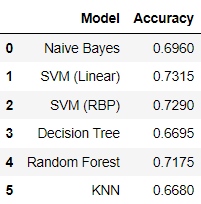

In [21]:
# get the "Machine-Learning" models and their accuracy from training notebooks
from IPython.display import Image
Image(filename='pic/ML_models_accuracy.png')

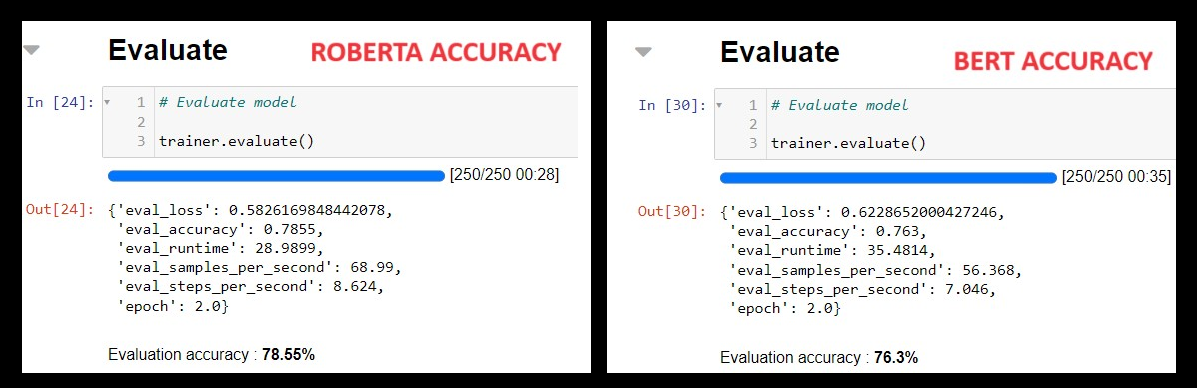

In [22]:
# get the "Deep-Learning" models and their accuracy from training notebooks
from IPython.display import Image
Image(filename='pic/dl_acc.png')

In [23]:
model_names = [ "Naive Bayes", "SVM (Linear)", "SVM (RBP)", "Decision Tree", "Random Forest", "KNN" , "ROBERTA", "BERT" ]
acc_list = [ 0.6960, 0.7315, 0.729, 0.6695, 0.7175, 0.6680, 0.785, 0.763 ]

df_metrics = pd.DataFrame({"Model": model_names, "Accuracy":acc_list})

In [24]:
df_metrics2 = df_metrics.sort_values(by='Accuracy', ascending=False)
df_metrics2

,Model,Accuracy
6,ROBERTA,0.7850
7,BERT,0.7630
1,SVM (Linear),0.7315
2,SVM (RBP),0.7290
4,Random Forest,0.7175
0,Naive Bayes,0.6960
3,Decision Tree,0.6695
5,KNN,0.6680


C:\Users\shahz\AppData\Local\Temp\ipykernel_11432\2437398116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_metrics2['Model'], y=df_metrics2['Accuracy'], palette='magma')


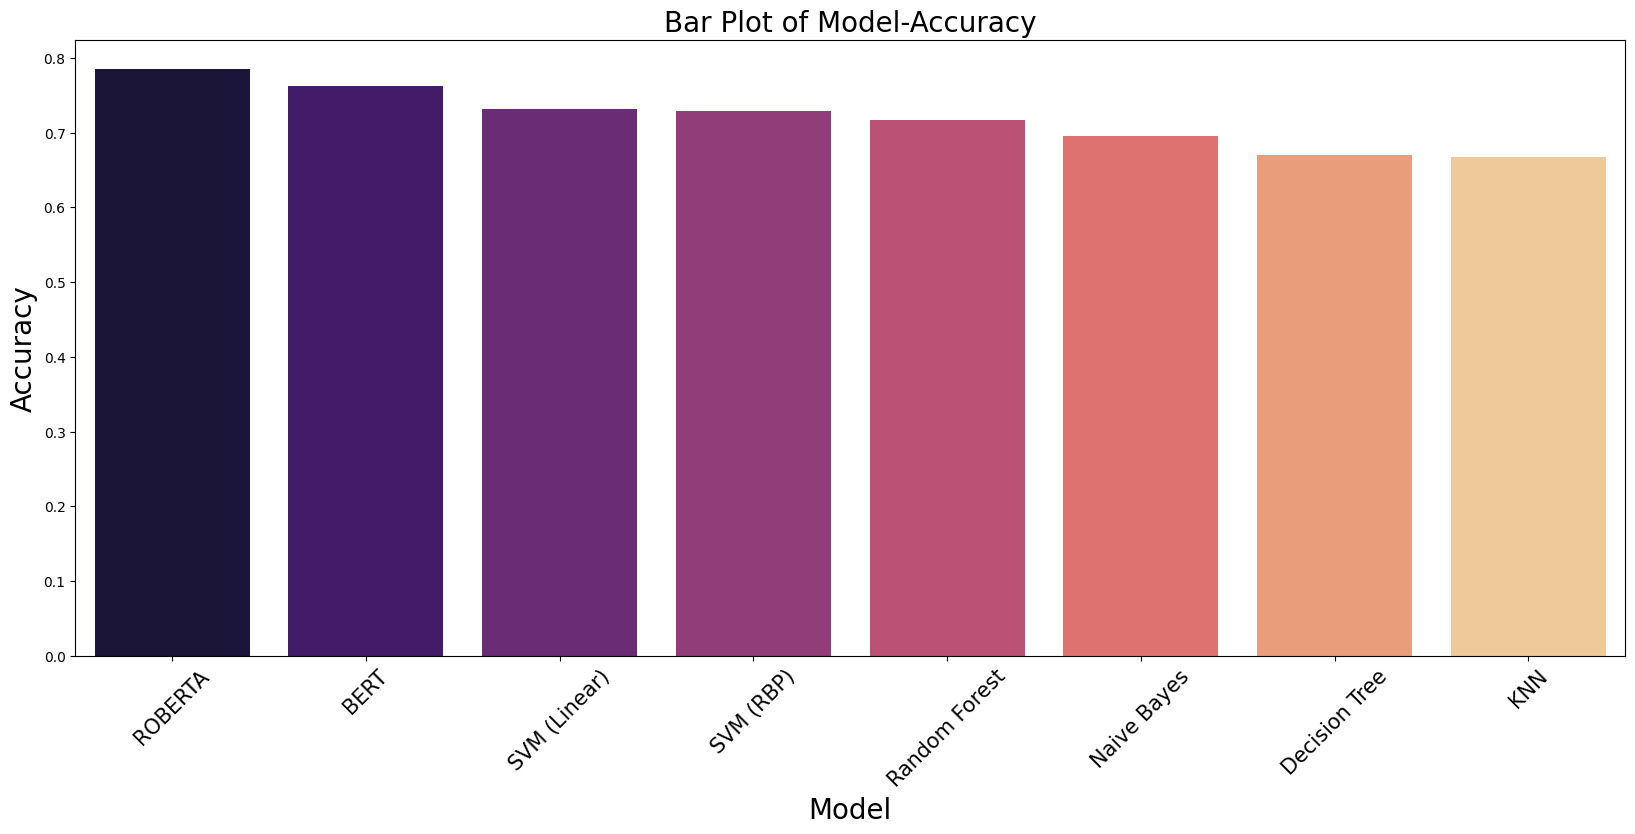

In [25]:
# Plotting a bar plot for the 'Accuracy' column

plt.figure(figsize=(20,8))
sns.barplot(x=df_metrics2['Model'], y=df_metrics2['Accuracy'], palette='magma')

plt.title('Bar Plot of Model-Accuracy', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

plt.tick_params(axis='x', labelsize=15) 
plt.xticks(rotation=45)
plt.show()

# Text Analysis

In [26]:
dataset_path = r"Sentiment_Predictions.csv"

df = pd.read_csv(dataset_path)
df.shape

(5176, 3)

In [27]:
df['safe_text']

0       <user> <user> ... &amp; 4 a vaccine given 2 he...
1       Students starting school without whooping coug...
2       I'm kinda over every ep of <user> being "rippe...
3       How many innocent children die for lack of vac...
4       CDC eyeing bird flu vaccine for humans, though...
                              ...                        
5171    jenny mccarthy is on new years rockin eve. wha...
5172    Measles reported in Clark Co. for 1st time sin...
5173    <user> issues alert regarding Measles in TX. K...
5174    I can't believe people don't vaccinate their k...
5175    "<user>  Alternatives to #Flu Vaccine <url> #n...
Name: safe_text, Length: 5176, dtype: object

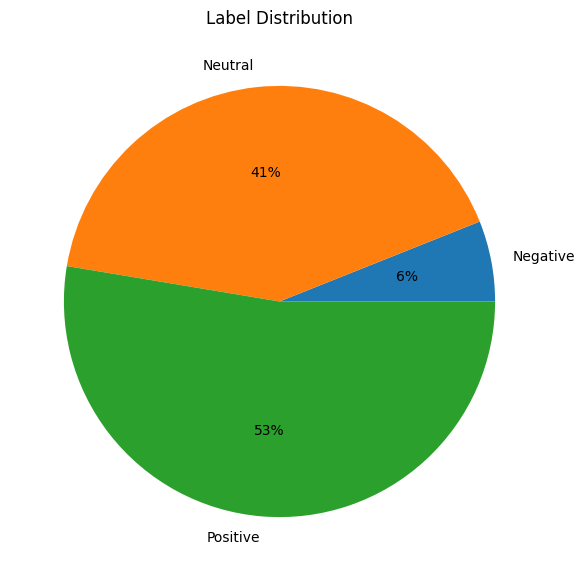

In [28]:
# Pie chart for label distribution

# map the numbers to text-labels
label_mapping = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
df['sentiment'] = df['sentiment'].map(label_mapping)

# get unique lables and frequency
labels=df['sentiment'].to_list()
label_ids, counts=np.unique(labels, return_counts=True)

# plot pie chart
plt.figure(figsize=(7,7))
plt.pie(counts, labels=label_ids, autopct='%.0f%%')
plt.title("Label Distribution")
plt.show()

C:\Users\shahz\AppData\Local\Temp\ipykernel_11432\2305726539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette="mako")


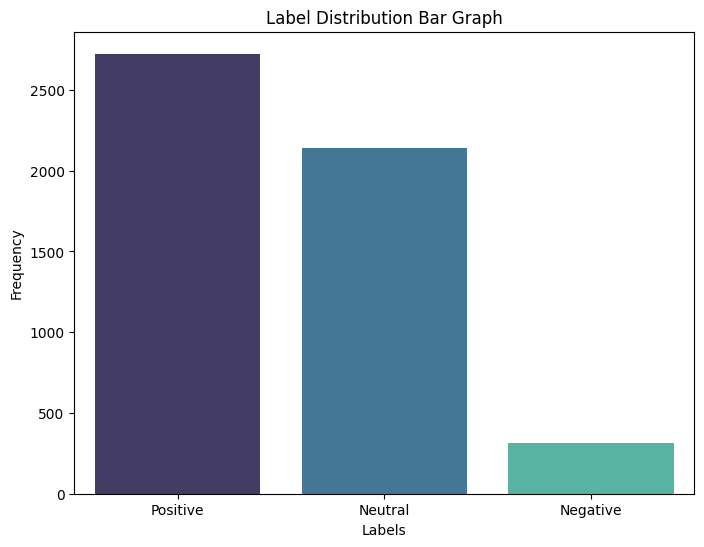

In [29]:
# Distribution of 'label' column using Bar Graph

plt.figure(figsize=(8, 6))
plt.title('Label Distribution Bar Graph')
plt.xlabel('Labels')
plt.ylabel('Frequency')
sns.countplot(data=df, x='sentiment', palette="mako")
plt.show()

### Analyze negative tweets

In [30]:
# get all the tweets with negative sentiment

df_temp = df[df.sentiment=="Negative"]

text_ll = []

print(df_temp.shape)
for x in df_temp.iterrows():
    text = x[1]['safe_text']
    print(text)
    text_ll.append(text)
    print("-"*100)

(313, 3)
Vaccines :-0 (@ Cherokee County Health Department) <url>
----------------------------------------------------------------------------------------------------
<user> #BlackLivesMatter #CDCWhistleblower African American Boys 3x more Likely to get Autism from Vaccines #MINE <url>
----------------------------------------------------------------------------------------------------
THIS IS A MUST READ! I Rolled My Eyes at Parents Who Said Vaccines Caused Their Kids’ Autism <url> #CDCwhistleblower
----------------------------------------------------------------------------------------------------
Woman Who Refused to Lie About Vaccines and was Kicked out of Nursing School Fights Back with Lawsuit <url> via <user>
----------------------------------------------------------------------------------------------------
“<user> GOP Congressman Falsely Accuses Immigrants of Carrying Diseases – Opposed Mandatory Vaccinations in U.S. <url>
-------------------------------------------------------

C:\Users\shahz\AppData\Local\Temp\ipykernel_11432\1113191670.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_hashtags.keys()), y=list(top_hashtags.values()), palette='magma')


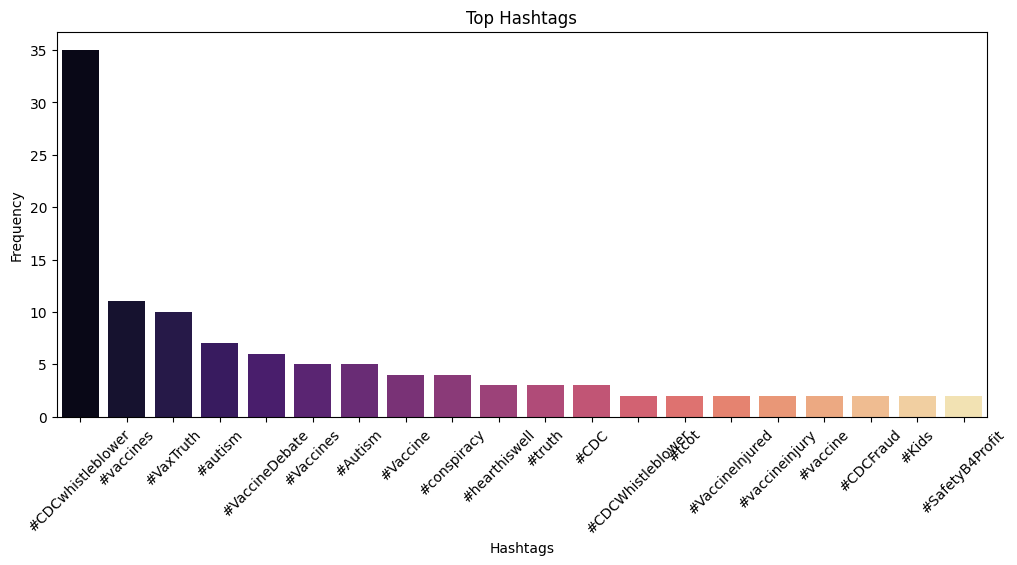

In [31]:
# plot trends/hashtags for the tweets

# get hashtags from text data
hashtag_list = df_temp['safe_text'].str.findall(r'#\w+')

# get a single list of hashtags
hashtags = [item for sublist in hashtag_list for item in sublist]

# get hashtag frequency
hashtag_dict = Counter(hashtags)

# Get top hashtags
top_hashtags = dict(hashtag_dict.most_common(20))

# bar plot to visualize the top hashtags
plt.figure(figsize=(12, 5))
sns.barplot(x=list(top_hashtags.keys()), y=list(top_hashtags.values()), palette='magma')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top Hashtags')
plt.xticks(rotation=45)
plt.show()

In [32]:
# fetch all tweets that contain  keyword "cdcwhistleblower" in it

j=0
for i,x in enumerate(text_ll):
    if "cdcwhistleblower" not in x.lower():
        continue
    print(str(j)+")   ", x)
    print("*"*100)
    j+=1
    
    
# CDCwhistleBlower###############

0)    <user> #BlackLivesMatter #CDCWhistleblower African American Boys 3x more Likely to get Autism from Vaccines #MINE <url>
****************************************************************************************************
1)    THIS IS A MUST READ! I Rolled My Eyes at Parents Who Said Vaccines Caused Their Kids’ Autism <url> #CDCwhistleblower
****************************************************************************************************
2)    “Mandate CDC do double blind study /autism rates of vaccinated vs. unvaccinated control groups. <url> #CDCwhistleblower
****************************************************************************************************
3)    <user> meet my vaccine injured child and you'll only need one reason. God bless him #CDCwhistleblower
****************************************************************************************************
4)    Past photo NYE 2000 #CDCwhistleblower 15 mos #mmr #VaccineInjured #Autism #hospital #howmanymore <url>
****

Following observations can be made from the tweets above.<br>
* (racism suspicion/race theory) Black-lives matter; African american boys more likely to get autism : [0,16](text-nuumber above)<br>
 * (belieiving rumours) vaccines caused child autism [1,5,30]<br>
 * (not believing medical experiment) : doing blind study again [2]<br>
 * (some info link) people believe them but may be false [6]<br>
 * (illusionary thinking) vaccine can cause sleepless night but scientifically not but by anxiety of vaccine. [9]<br>
 * (findings or research outcomes causing mistrust) for some vaccines, they can create mistrust for other vaccines; vaccine risks [11, 27]<br>
 * (vaccine commercialization perception) [17,18,20,26]<br>
 * (Demanding proof) Vaccine does not cause autism [25]<br>
 * (Allegation) Vaccine make child low IQ [31]    <br>

In [33]:
# fetch all tweets that contain  keyword "cause" in it

j=0
for i,x in enumerate(text_ll):
    if "cause" not in x.lower():
        continue
    print(str(j)+")   ", x)
    print("*"*100)
    j+=1
    

0)    THIS IS A MUST READ! I Rolled My Eyes at Parents Who Said Vaccines Caused Their Kids’ Autism <url> #CDCwhistleblower
****************************************************************************************************
1)    Italian court rules mercury and aluminum in vaccines cause autism: US media continues total b… <url> via <user>
****************************************************************************************************
2)    "<user> Vaccines cause sudden death, proves document hidden by Big Pharma for two years - <url> <url>
****************************************************************************************************
3)    <user> As a vaccine injured dental assistant who can no longer work because of health issues from vaccine-she has a right to chose not to
****************************************************************************************************
4)    US government openly admits vaccines can cause polio, seizures and death in published Vaccine Inj

In [34]:
# fetch all tweets that contain  keyword "url" in it

j=0
for i,x in enumerate(text_ll):
    if "url" not in x.lower():
        continue
    print(str(j)+")   ", x)
    print("*"*100)
    j+=1
    

0)    Vaccines :-0 (@ Cherokee County Health Department) <url>
****************************************************************************************************
1)    <user> #BlackLivesMatter #CDCWhistleblower African American Boys 3x more Likely to get Autism from Vaccines #MINE <url>
****************************************************************************************************
2)    THIS IS A MUST READ! I Rolled My Eyes at Parents Who Said Vaccines Caused Their Kids’ Autism <url> #CDCwhistleblower
****************************************************************************************************
3)    Woman Who Refused to Lie About Vaccines and was Kicked out of Nursing School Fights Back with Lawsuit <url> via <user>
****************************************************************************************************
4)    “<user> GOP Congressman Falsely Accuses Immigrants of Carrying Diseases – Opposed Mandatory Vaccinations in U.S. <url>
**********************************

In [36]:
# get top most occuring words in the text from tweets. The count is divided by maximum frequency to form a list of 
# fractional values.

wordcloud = WordCloud(width=900, height=450, background_color='white').generate(' '.join(df_temp['safe_text']))
word_freq = wordcloud.words_
top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:30]


top_words = [ (k,v) for k,v in top_words if ("user" not in k.lower() or 
                                             "amp" not in  k.lower() or
                                            "U" not in  k ) ]


top_words

[('vaccine', 1.0),
 ('url', 0.45867768595041325),
 ('user user', 0.359504132231405),
 ('autism', 0.256198347107438),
 ('url user', 0.1859504132231405),
 ('user', 0.1652892561983471),
 ('CDCwhistleblower', 0.15702479338842976),
 ('amp', 0.15289256198347106),
 ('U', 0.12396694214876033),
 ('CDC', 0.12396694214876033),
 ('disease', 0.10743801652892562),
 ('kid', 0.10330578512396695),
 ('Health', 0.09090909090909091),
 ('Measles', 0.09090909090909091),
 ('cause', 0.08677685950413223),
 ('vaccination', 0.08264462809917356),
 ('truth', 0.07851239669421488),
 ('say', 0.07851239669421488),
 ('via user', 0.07851239669421488),
 ('url via', 0.0743801652892562),
 ('mercury', 0.07024793388429752),
 ('s', 0.06198347107438017),
 ('MMR', 0.06198347107438017),
 ('Parents', 0.05785123966942149),
 ('death', 0.05785123966942149),
 ('flu vaccine', 0.05785123966942149),
 ('children', 0.05371900826446281),
 ('Ebola', 0.05371900826446281),
 ('conspiracy', 0.049586776859504134),
 ('one', 0.045454545454545456)]

In [37]:
# fetch all tweets that contain  keyword "autism" in it

j=0
for i,x in enumerate(text_ll):
    if "autism" not in x.lower():
        continue
    print(str(j)+")   ", x)
    print("-"*100)
    j+=1
    

0)    <user> #BlackLivesMatter #CDCWhistleblower African American Boys 3x more Likely to get Autism from Vaccines #MINE <url>
----------------------------------------------------------------------------------------------------
1)    THIS IS A MUST READ! I Rolled My Eyes at Parents Who Said Vaccines Caused Their Kids’ Autism <url> #CDCwhistleblower
----------------------------------------------------------------------------------------------------
2)    Italian court rules mercury and aluminum in vaccines cause autism: US media continues total b… <url> via <user>
----------------------------------------------------------------------------------------------------
3)    “Mandate CDC do double blind study /autism rates of vaccinated vs. unvaccinated control groups. <url> #CDCwhistleblower
----------------------------------------------------------------------------------------------------
4)    CDC Whistleblower Admits Suppressing Information Regarding #Vaccines and #Autism <url> #tcot via 

### Analyze Positive tweets

In [38]:
df_temp = df[df.sentiment=="Positive"]

text_pos_ll = []

print(df_temp.shape)
for x in df_temp.iterrows():
    text = x[1]['safe_text']
    print(text)
    text_pos_ll.append(text)
    print("-"*100)

(2724, 3)
<user> <user> ... &amp; 4 a vaccine given 2 healthy peeps, FDA think just not worth the AE risk unfortunately.
----------------------------------------------------------------------------------------------------
Students starting school without whooping cough vaccinations <url> #scpick
----------------------------------------------------------------------------------------------------
How many innocent children die for lack of vaccination each year? Around 1.5 million. Too bad all their parents couldn't be here. #SB277
----------------------------------------------------------------------------------------------------
I think that active duty soldiers should get vaccines first then anyone who has served then civilians in a disease out break.
----------------------------------------------------------------------------------------------------
As if the vaccination scares weren't enough, thank you <user> for using scare tactics to further your own cause.  <url>
-----------------

C:\Users\shahz\AppData\Local\Temp\ipykernel_11432\1821226021.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_hashtags.keys()), y=list(top_hashtags.values()), palette='magma')


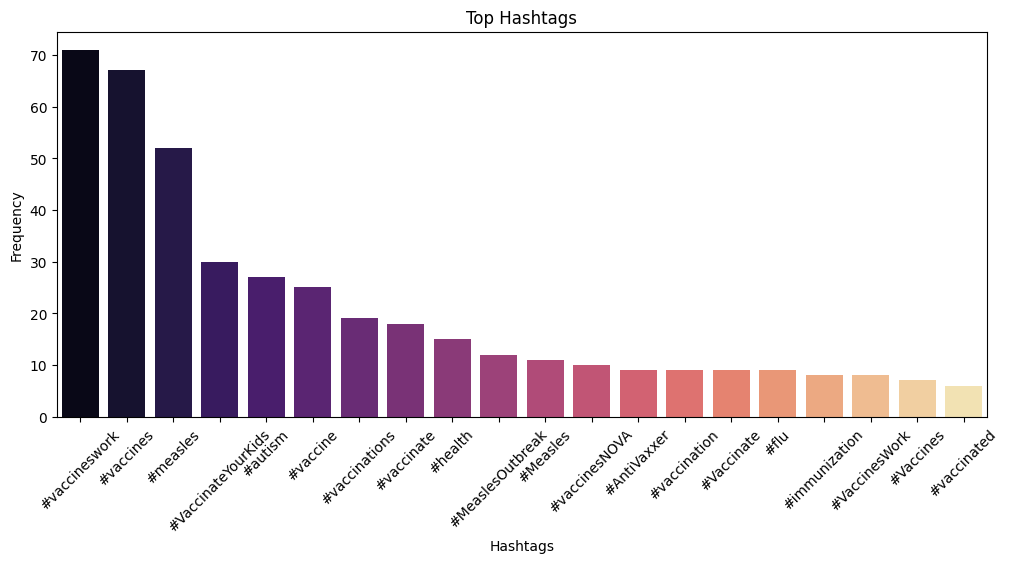

In [39]:
# get top trends/hashtags 

hashtag_list = df_temp['safe_text'].str.findall(r'#\w+')

hashtags = [item for sublist in hashtag_list for item in sublist]

hashtag_dict = Counter(hashtags)

top_hashtags = dict(hashtag_dict.most_common(20))

# bar plot to visualize the top hashtags
plt.figure(figsize=(12, 5))
sns.barplot(x=list(top_hashtags.keys()), y=list(top_hashtags.values()), palette='magma')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top Hashtags')
plt.xticks(rotation=45)
plt.show()

In [40]:
# get top frequent words

wordcloud_pos = WordCloud(width=900, height=450, background_color='white').generate(' '.join(df_temp['safe_text']))

word_freq_pos = wordcloud_pos.words_
top_words_pos = sorted(word_freq_pos.items(), key=lambda x: x[1], reverse=True)[:30]


top_words_pos = [ (k,v) for k,v in top_words_pos if ("user" not in k.lower() or 
                                             "amp" not in  k.lower() or
                                            "U" not in  k ) ]


top_words_pos

[('vaccine', 1.0),
 ('url', 0.8818181818181818),
 ('kid', 0.8272727272727273),
 ('vaccinate', 0.5948051948051948),
 ('measles', 0.5623376623376624),
 ('user', 0.5584415584415584),
 ('children', 0.5363636363636364),
 ('user user', 0.5116883116883116),
 ('vaccination', 0.4974025974025974),
 ('vaccinated', 0.37272727272727274),
 ('parent', 0.3155844155844156),
 ('url user', 0.3103896103896104),
 ('people', 0.2922077922077922),
 ('child', 0.24415584415584415),
 ('amp', 0.20909090909090908),
 ('autism', 0.2064935064935065),
 ('disease', 0.18701298701298702),
 ('school', 0.18311688311688312),
 ('health', 0.17272727272727273),
 ('immunization', 0.16753246753246753),
 ('u', 0.14545454545454545),
 ('shot', 0.12987012987012986),
 ('now', 0.12857142857142856),
 ('vaccinating', 0.12597402597402596),
 ('got', 0.12467532467532468),
 ('risk', 0.12207792207792208),
 ('will', 0.12207792207792208),
 ('getting', 0.12077922077922078),
 ('cause autism', 0.12077922077922078),
 ('need', 0.11818181818181818)]

### Analyze neutral tweets

In [41]:
df_temp = df[df.sentiment=="Neutral"]

text_neu_ll = []

print(df_temp.shape)
for x in df_temp.iterrows():
    text = x[1]['safe_text']
    print(text)
    text_neu_ll.append(text)
    print("-"*100)

(2139, 3)
I'm kinda over every ep of <user> being "ripped from the headlines." Measles? Let's get back to crime. #SVU
----------------------------------------------------------------------------------------------------
CDC eyeing bird flu vaccine for humans, though risk is low: Federal officials said Wednesday they're taking steps… <url>
----------------------------------------------------------------------------------------------------
New Choices For Seasonal Flu Vaccines: WebMD Health NewsBy Brenda Goodman, MAReviewed by Michael W. Smith,... <url>
----------------------------------------------------------------------------------------------------
Mom: "do you feel sick in any other way? A fever? Maybe a cough? Pink eye is a symptom of Measles, I looked it up" 😑
----------------------------------------------------------------------------------------------------
<user> :  I have built up immunity to those disease ridden kids!  Ha
-------------------------------------------------------

C:\Users\shahz\AppData\Local\Temp\ipykernel_11432\1821226021.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_hashtags.keys()), y=list(top_hashtags.values()), palette='magma')


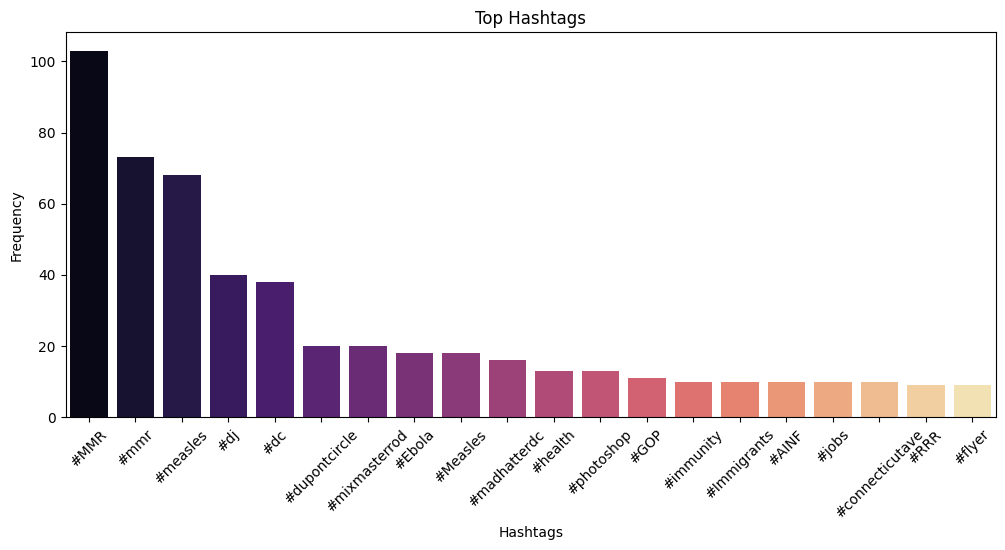

In [42]:
# get top trends/hashtags 

hashtag_list = df_temp['safe_text'].str.findall(r'#\w+')

hashtags = [item for sublist in hashtag_list for item in sublist]

hashtag_dict = Counter(hashtags)

top_hashtags = dict(hashtag_dict.most_common(20))

# bar plot to visualize the top hashtags
plt.figure(figsize=(12, 5))
sns.barplot(x=list(top_hashtags.keys()), y=list(top_hashtags.values()), palette='magma')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top Hashtags')
plt.xticks(rotation=45)
plt.show()

In [43]:
# top frequent occuring words

wordcloud_neu = WordCloud(width=900, height=450, background_color='white').generate(' '.join(df_temp['safe_text']))

word_freq_neu = wordcloud_neu.words_
top_words_neu = sorted(word_freq_neu.items(), key=lambda x: x[1], reverse=True)[:30]


top_words_neu = [ (k,v) for k,v in top_words_neu if ("user" not in k.lower() or 
                                             "amp" not in  k.lower() or
                                            "U" not in  k ) ]


top_words_neu

[('measles', 1.0),
 ('url', 0.9450171821305842),
 ('user', 0.3848797250859107),
 ('MMR', 0.3734249713631157),
 ('url user', 0.29896907216494845),
 ('user user', 0.2852233676975945),
 ('measles outbreak', 0.2027491408934708),
 ('immunity', 0.1981672394043528),
 ('vaccine', 0.17525773195876287),
 ('measles case', 0.14891179839633448),
 ('health', 0.140893470790378),
 ('New', 0.12829324169530354),
 ('Disneyland', 0.12600229095074456),
 ('amp', 0.1145475372279496),
 ('school', 0.1111111111111111),
 ('health official', 0.09392898052691867),
 ('vaccination', 0.09278350515463918),
 ('people', 0.09163802978235967),
 ('live longer', 0.09049255441008018),
 ('tension increase', 0.09049255441008018),
 ('longer Releasing', 0.08934707903780069),
 ('increases immunity', 0.08934707903780069),
 ('complain live', 0.0882016036655212),
 ('California', 0.08132875143184422),
 ('now', 0.07789232531500573),
 ('got', 0.07560137457044673),
 ('case', 0.07560137457044673),
 ('U', 0.06987399770904926),
 ('boost', 

In [44]:
# display texts that contain "measle" keyword.

j=0
for i,x in enumerate(text_neu_ll):
    if "measle" not in x.lower():
        continue
    print(str(j)+")   ", x)
    print("-"*100)
    j+=1
    

0)    I'm kinda over every ep of <user> being "ripped from the headlines." Measles? Let's get back to crime. #SVU
----------------------------------------------------------------------------------------------------
1)    Mom: "do you feel sick in any other way? A fever? Maybe a cough? Pink eye is a symptom of Measles, I looked it up" 😑
----------------------------------------------------------------------------------------------------
2)    <user> Are you sure you want to come back to a measles outbreak?
----------------------------------------------------------------------------------------------------
3)    Disney parks-linked measles outbreak grows to 70 cases <url>
----------------------------------------------------------------------------------------------------
4)    This made me think of you. <user> “<user> Seattle Kings Of Leon fans may have been exposed to measles <url>
----------------------------------------------------------------------------------------------------
5)    